Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense

**Dwa gangi**

Zbiór danych:

In [21]:
[0]*10+[1]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [22]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000)
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2)
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))
labels

array([0., 0., 0., ..., 1., 1., 1.])

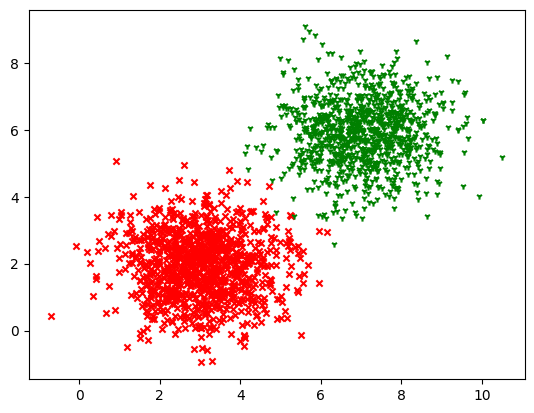

In [23]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

In [24]:
x_label1

array([ 4.59911355,  5.12942909,  2.86082513,  2.17793411,  3.34089903,
        1.81101714,  2.98421732,  5.24726396,  4.31730552,  2.07918603,
        2.46166834,  2.7234611 ,  1.7281592 ,  2.33910375,  1.92865911,
        2.37698611,  3.05527073,  1.47571398,  4.73247349,  2.82857371,
        3.50380161,  1.9969566 ,  0.79068498,  2.61315295,  2.41089116,
        1.26653343,  3.07521896,  3.62907952,  2.08520193,  3.99769577,
        2.14394516,  2.06298881,  3.29770139,  3.36152166,  2.99853252,
        3.23013677,  3.57451412,  5.23831292,  3.21497766,  2.36612116,
        3.65193375,  2.85902348,  2.60533034,  3.87038749,  3.93963198,
        3.34381505,  1.02509555,  3.63717886,  3.02947076,  2.31045838,
        3.21366088,  3.71435843,  1.30045847,  2.82611771,  3.0967907 ,
        3.81763444,  1.61221124,  3.39235291,  2.34026985,  2.34442791,
        2.52870724,  0.73236793,  2.16723857,  3.80478033,  2.72691827,
        2.60417212,  3.18473518,  2.75276409,  4.39027186,  1.97

Definiujemy model:

In [25]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [26]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [27]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [28]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [30]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[4.59911355, 0.97664184],
       [5.12942909, 1.3036076 ],
       [2.86082513, 3.42102928],
       ...,
       [6.95434383, 6.18464347],
       [6.07670661, 6.40313423],
       [8.22009436, 6.28592032]])

Proces **uczenia**:

In [31]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 5ms/step - loss: 0.5761 - val_loss: 0.2648
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4203 - val_loss: 0.3288
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3449 - val_loss: 0.2496
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2894 - val_loss: 0.2027
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2505 - val_loss: 0.2009
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2198 - val_loss: 0.2352
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1978 - val_loss: 0.1833
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1800 - val_loss: 0.1795
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1644 - val_loss: 0.1148
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1524 - val_loss: 0.1004
Epoch 11/

In [32]:
Loss = h.history['loss']
Loss

[0.5761423110961914,
 0.4202660620212555,
 0.34492236375808716,
 0.28937283158302307,
 0.2505454421043396,
 0.21981407701969147,
 0.19776563346385956,
 0.1799744963645935,
 0.16444331407546997,
 0.1524360626935959,
 0.14113318920135498,
 0.13331635296344757,
 0.12560336291790009,
 0.11953039467334747,
 0.11299195885658264,
 0.107688769698143,
 0.10300647467374802,
 0.09889683127403259,
 0.0947609394788742,
 0.09162610024213791,
 0.08807015419006348,
 0.08528430759906769,
 0.08266517519950867,
 0.0800493061542511,
 0.07772283256053925,
 0.07565836608409882,
 0.07351138442754745,
 0.07160312682390213,
 0.0699789971113205,
 0.06811446696519852,
 0.06679750233888626,
 0.06529758125543594,
 0.06385596096515656,
 0.06262469291687012,
 0.06106019392609596,
 0.06022892892360687,
 0.0586392767727375,
 0.05782625824213028,
 0.0567292720079422,
 0.055857472121715546,
 0.05508968234062195,
 0.054110657423734665,
 0.05310359597206116,
 0.05214017257094383,
 0.05150304734706879,
 0.05073777213692665

Sprawdźmy jakie są **wartości wag**:

In [33]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.976188 ]
 [1.4137076]]
[-10.545252]


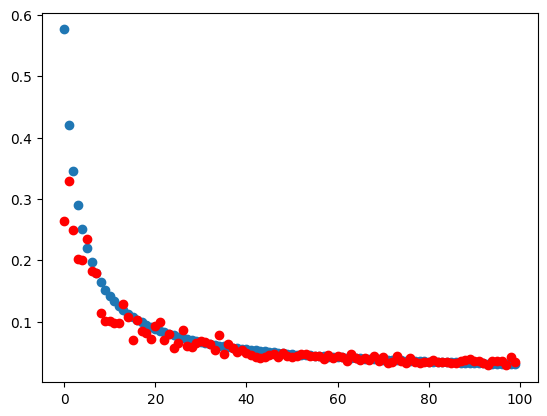

In [34]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

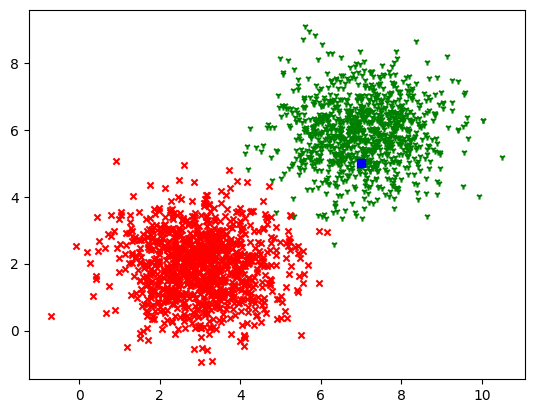

In [35]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [36]:
model.predict([[x,y]])

1/1 [==============================] - 0s 60ms/step


array([[1.]], dtype=float32)

Learning rate 0.01

Definiujemy model:

In [37]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [38]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [39]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

In [40]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [42]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[4.59911355, 0.97664184],
       [5.12942909, 1.3036076 ],
       [2.86082513, 3.42102928],
       ...,
       [6.95434383, 6.18464347],
       [6.07670661, 6.40313423],
       [8.22009436, 6.28592032]])

Proces **uczenia**:

In [43]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 5ms/step - loss: 1.9495 - val_loss: 0.8202
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.8302 - val_loss: 0.5461
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7610 - val_loss: 0.5056
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7047 - val_loss: 0.4891
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6582 - val_loss: 0.4527
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6196 - val_loss: 0.4254
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5871 - val_loss: 0.3889
Epoch 8/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5593 - val_loss: 0.3790
Epoch 9/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5360 - val_loss: 0.3623
Epoch 10/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5158 - val_loss: 0.3515
Epoch 11/

In [44]:
Loss = h.history['loss']
Loss

[1.9495484828948975,
 0.8301963806152344,
 0.7609966993331909,
 0.7047141194343567,
 0.6581751108169556,
 0.6195790767669678,
 0.5871309041976929,
 0.5593425631523132,
 0.5360467433929443,
 0.5158253312110901,
 0.49763545393943787,
 0.4815666973590851,
 0.46746379137039185,
 0.45394977927207947,
 0.44153544306755066,
 0.43052101135253906,
 0.4199589788913727,
 0.40979504585266113,
 0.4005170464515686,
 0.39174437522888184,
 0.38308659195899963,
 0.37531429529190063,
 0.3676421642303467,
 0.36019131541252136,
 0.3533878028392792,
 0.3464795649051666,
 0.34018173813819885,
 0.33377280831336975,
 0.32797062397003174,
 0.3222457468509674,
 0.31677377223968506,
 0.3111974596977234,
 0.30611416697502136,
 0.3010215163230896,
 0.29604870080947876,
 0.2917642295360565,
 0.2871255576610565,
 0.2828131914138794,
 0.2783903181552887,
 0.27444204688072205,
 0.2704157829284668,
 0.2665533125400543,
 0.2627703845500946,
 0.2590733766555786,
 0.2555151879787445,
 0.25204041600227356,
 0.2486816793680

Sprawdźmy jakie są **wartości wag**:

In [45]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.27534017]
 [0.8080815 ]]
[-4.4306183]


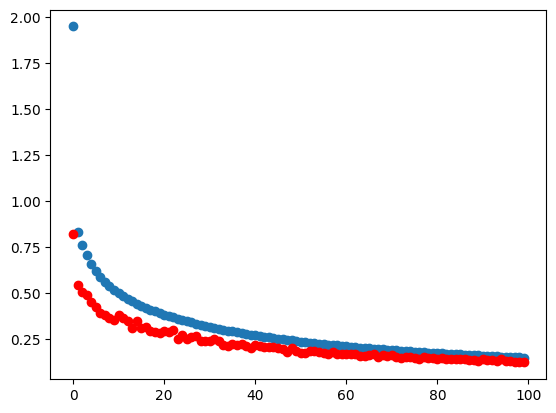

In [46]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

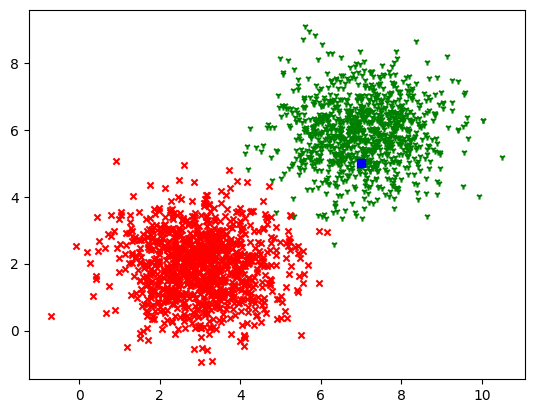

In [47]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [48]:
model.predict([[x,y]])

1/1 [==============================] - 0s 74ms/step


array([[1.]], dtype=float32)

Learning rate 0.1 optimizer ADAM

Definiujemy model:

In [49]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [50]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [51]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [52]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [54]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[4.59911355, 0.97664184],
       [5.12942909, 1.3036076 ],
       [2.86082513, 3.42102928],
       ...,
       [6.95434383, 6.18464347],
       [6.07670661, 6.40313423],
       [8.22009436, 6.28592032]])

Proces **uczenia**:

In [55]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 8ms/step - loss: 0.5387 - val_loss: 0.2418
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1999 - val_loss: 0.1078
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1250 - val_loss: 0.1010
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0897 - val_loss: 0.0694
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0702 - val_loss: 0.0371
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0572 - val_loss: 0.0537
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0485 - val_loss: 0.0549
Epoch 8/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0431 - val_loss: 0.0400
Epoch 9/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0379 - val_loss: 0.0451
Epoch 10/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0348 - val_loss: 0.0208
Epoch 11/

In [56]:
Loss = h.history['loss']
Loss

[0.5386853218078613,
 0.19989891350269318,
 0.1250283271074295,
 0.08968822658061981,
 0.07018157839775085,
 0.05716025456786156,
 0.048519060015678406,
 0.04308348521590233,
 0.03793005272746086,
 0.03482237458229065,
 0.031020913273096085,
 0.028922319412231445,
 0.02691604383289814,
 0.025632373988628387,
 0.023224126547574997,
 0.022314423695206642,
 0.02090073749423027,
 0.019845299422740936,
 0.019933292642235756,
 0.018649393692612648,
 0.017675884068012238,
 0.016886163502931595,
 0.01673060841858387,
 0.01654864102602005,
 0.015591024421155453,
 0.014664776623249054,
 0.015314793214201927,
 0.01386348158121109,
 0.013393695466220379,
 0.013380570337176323,
 0.01289376337081194,
 0.013582088053226471,
 0.012495542876422405,
 0.01256813295185566,
 0.011906122788786888,
 0.011535903438925743,
 0.010942267253994942,
 0.011542756110429764,
 0.010769643820822239,
 0.010209773667156696,
 0.011248793452978134,
 0.010210676118731499,
 0.01088247075676918,
 0.011219566687941551,
 0.0099

Sprawdźmy jakie są **wartości wag**:

In [57]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[2.8030927]
 [3.1745062]]
[-28.42742]


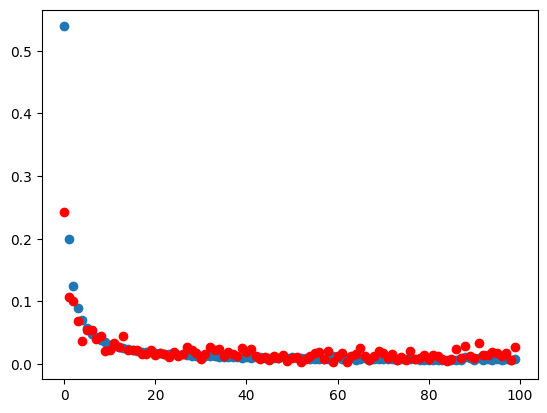

In [58]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

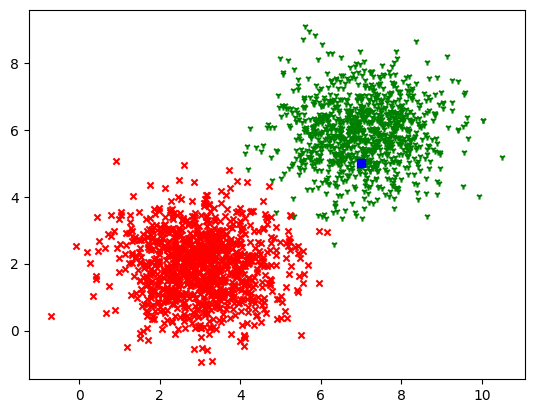

In [59]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [60]:
model.predict([[x,y]])

1/1 [==============================] - 0s 88ms/step


array([[1.]], dtype=float32)

Learning rate 0.01 Optimizer Adam

Definiujemy model:

In [61]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [62]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [63]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [64]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [66]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[4.59911355, 0.97664184],
       [5.12942909, 1.3036076 ],
       [2.86082513, 3.42102928],
       ...,
       [6.95434383, 6.18464347],
       [6.07670661, 6.40313423],
       [8.22009436, 6.28592032]])

Proces **uczenia**:

In [67]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 8ms/step - loss: 2.0408 - val_loss: 1.9414
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.8560 - val_loss: 0.5161
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.7163 - val_loss: 0.5207
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6182 - val_loss: 0.4677
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5350 - val_loss: 0.3834
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4680 - val_loss: 0.3500
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4126 - val_loss: 0.3049
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3674 - val_loss: 0.2966
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3299 - val_loss: 0.2426
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2989 - val_loss: 0.2285
Epoch 11/

In [68]:
Loss = h.history['loss']
Loss

[2.040762424468994,
 0.8559988141059875,
 0.7162731885910034,
 0.6182424426078796,
 0.5350062251091003,
 0.46802449226379395,
 0.41262999176979065,
 0.36741214990615845,
 0.32989633083343506,
 0.29890304803848267,
 0.27233338356018066,
 0.2497129887342453,
 0.23063749074935913,
 0.21338103711605072,
 0.19847732782363892,
 0.18535557389259338,
 0.17359182238578796,
 0.16308872401714325,
 0.15368027985095978,
 0.14503780007362366,
 0.1373233199119568,
 0.130354106426239,
 0.12389212846755981,
 0.11801648885011673,
 0.11256449669599533,
 0.10765988379716873,
 0.10290461778640747,
 0.09862511605024338,
 0.09471334517002106,
 0.09095311909914017,
 0.08742032200098038,
 0.08429049700498581,
 0.08120639622211456,
 0.07841527462005615,
 0.07571256905794144,
 0.07311233133077621,
 0.07074279338121414,
 0.06861764192581177,
 0.06634446233510971,
 0.06426400691270828,
 0.062460266053676605,
 0.060596808791160583,
 0.058860503137111664,
 0.0572054386138916,
 0.05562101677060127,
 0.054229274392127

Sprawdźmy jakie są **wartości wag**:

In [69]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[1.2608098]
 [1.6906005]]
[-12.958403]


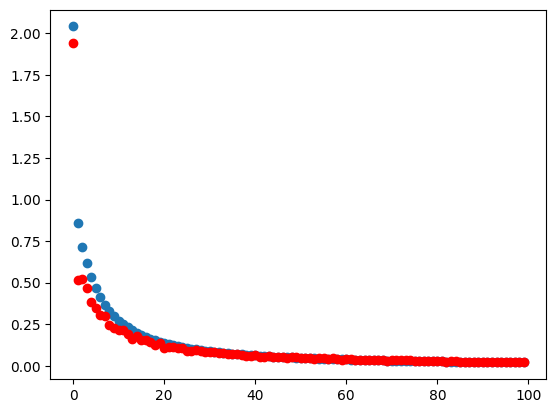

In [70]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

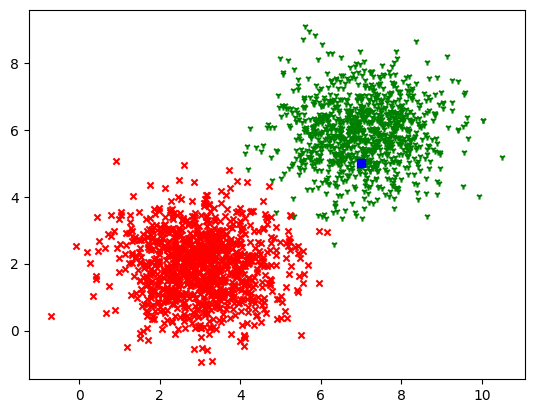

In [71]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [72]:
model.predict([[x,y]])

1/1 [==============================] - 0s 61ms/step


array([[1.]], dtype=float32)

##Number of epochs - 200

Definiujemy model:

In [73]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [74]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [75]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [76]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [77]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [78]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[4.59911355, 0.97664184],
       [5.12942909, 1.3036076 ],
       [2.86082513, 3.42102928],
       ...,
       [6.95434383, 6.18464347],
       [6.07670661, 6.40313423],
       [8.22009436, 6.28592032]])

Proces **uczenia**:

In [79]:
epochs = 200
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/200
50/50 [==============================] - 1s 5ms/step - loss: 0.6344 - val_loss: 0.5306
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4550 - val_loss: 0.2821
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.3658 - val_loss: 0.2821
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 0.3072 - val_loss: 0.2750
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.2614 - val_loss: 0.1990
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 0.2294 - val_loss: 0.1714
Epoch 7/200
50/50 [==============================] - 0s 2ms/step - loss: 0.2044 - val_loss: 0.1373
Epoch 8/200
50/50 [==============================] - 0s 2ms/step - loss: 0.1847 - val_loss: 0.1799
Epoch 9/200
50/50 [==============================] - 0s 3ms/step - loss: 0.1693 - val_loss: 0.1132
Epoch 10/200
50/50 [==============================] - 0s 2ms/step - loss: 0.1563 - val_loss: 0.1140
Epoch 11/

In [80]:
Loss = h.history['loss']
Loss

[0.6343810558319092,
 0.4549606442451477,
 0.3658186197280884,
 0.30723515152931213,
 0.2613564729690552,
 0.22943565249443054,
 0.20435862243175507,
 0.18468612432479858,
 0.16930416226387024,
 0.1562744826078415,
 0.14566467702388763,
 0.13617374002933502,
 0.12850429117679596,
 0.12089278548955917,
 0.11420197784900665,
 0.10907772183418274,
 0.10480862855911255,
 0.10010360926389694,
 0.09591423720121384,
 0.09281819313764572,
 0.08882304280996323,
 0.08589113503694534,
 0.0831821858882904,
 0.0811050534248352,
 0.07882877439260483,
 0.07609118521213531,
 0.07442312687635422,
 0.07228884100914001,
 0.07068789005279541,
 0.06866579502820969,
 0.06718999147415161,
 0.06561041623353958,
 0.06433312594890594,
 0.06305196136236191,
 0.06158654764294624,
 0.0601915679872036,
 0.05918373912572861,
 0.05810976400971413,
 0.057220209389925,
 0.05609291419386864,
 0.055080633610486984,
 0.0544193759560585,
 0.05335718020796776,
 0.05249433219432831,
 0.0517297238111496,
 0.05111091211438179,

Sprawdźmy jakie są **wartości wag**:

In [81]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[1.2378157]
 [1.6589917]]
[-12.722816]


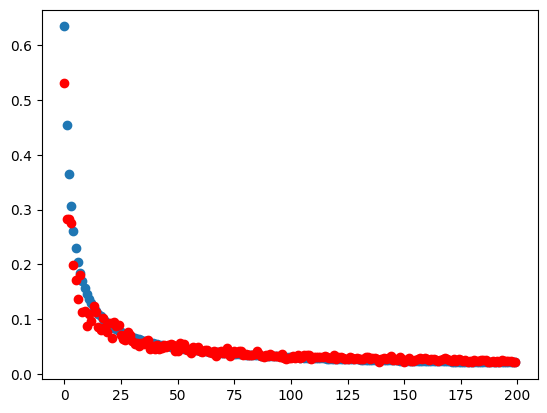

In [82]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

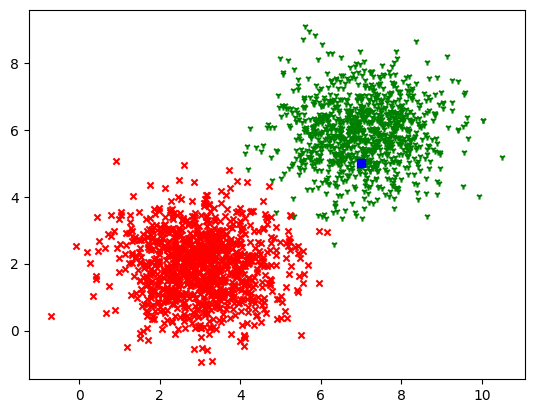

In [83]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [84]:
model.predict([[x,y]])

1/1 [==============================] - 0s 67ms/step


array([[1.]], dtype=float32)

##Number of epochs - 10

Definiujemy model:

In [85]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [86]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [87]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [88]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [89]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [90]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[4.59911355, 0.97664184],
       [5.12942909, 1.3036076 ],
       [2.86082513, 3.42102928],
       ...,
       [6.95434383, 6.18464347],
       [6.07670661, 6.40313423],
       [8.22009436, 6.28592032]])

Proces **uczenia**:

In [91]:
epochs = 10
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 0s 5ms/step - loss: 0.7866 - val_loss: 0.3952
Epoch 2/10
50/50 [==============================] - 0s 2ms/step - loss: 0.4571 - val_loss: 0.2438
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.3674 - val_loss: 0.2025
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 0.3076 - val_loss: 0.2083
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2644 - val_loss: 0.2335
Epoch 6/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2302 - val_loss: 0.2031
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2054 - val_loss: 0.1173
Epoch 8/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1858 - val_loss: 0.1901
Epoch 9/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1700 - val_loss: 0.1430
Epoch 10/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1575 - val_loss: 0.1046


In [92]:
Loss = h.history['loss']
Loss

[0.7865601181983948,
 0.45706140995025635,
 0.3674454987049103,
 0.3076130747795105,
 0.26441678404808044,
 0.23018169403076172,
 0.20535224676132202,
 0.18581746518611908,
 0.16995273530483246,
 0.15750856697559357]

Sprawdźmy jakie są **wartości wag**:

In [93]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.29183912]
 [0.81965226]]
[-4.3890634]


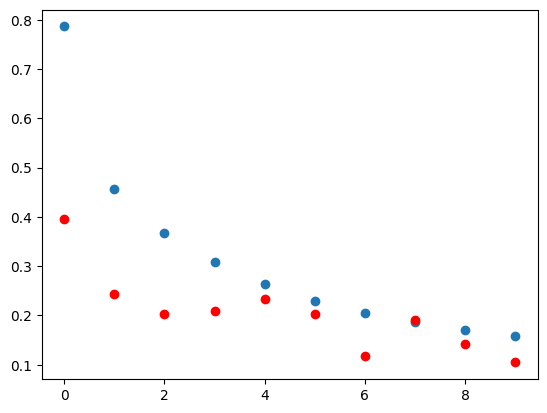

In [94]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

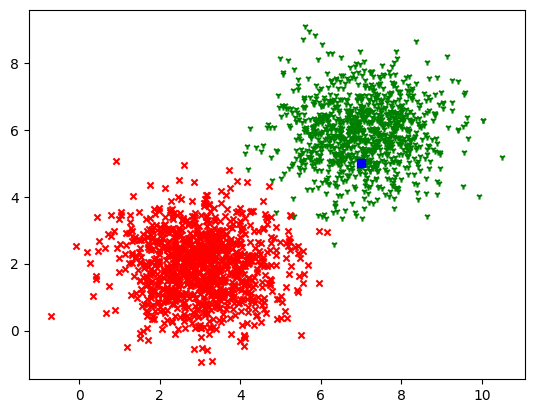

In [95]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [96]:
model.predict([[x,y]])

1/1 [==============================] - 0s 68ms/step


array([[1.]], dtype=float32)

#Batch size - 10

Definiujemy model:

In [97]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [98]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [99]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [100]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [101]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [102]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[4.59911355, 0.97664184],
       [5.12942909, 1.3036076 ],
       [2.86082513, 3.42102928],
       ...,
       [6.95434383, 6.18464347],
       [6.07670661, 6.40313423],
       [8.22009436, 6.28592032]])

Proces **uczenia**:

In [103]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2, batch_size=10)

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5105 - val_loss: 0.2114
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2573 - val_loss: 0.1667
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1789 - val_loss: 0.0982
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.1352
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1163 - val_loss: 0.0736
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1007 - val_loss: 0.0947
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0891 - val_loss: 0.0654
Epoch 8/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0795 - val_loss: 0.0891
Epoch 9/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0737 - val_loss: 0.0680
Epoch 10/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0680 - val_lo

In [104]:
Loss = h.history['loss']
Loss

[0.5104992389678955,
 0.25726795196533203,
 0.17887549102306366,
 0.14041326940059662,
 0.11628986150026321,
 0.10072020441293716,
 0.08907120674848557,
 0.07946057617664337,
 0.07373444736003876,
 0.06795407086610794,
 0.06284111738204956,
 0.05962982028722763,
 0.05608682706952095,
 0.05304213613271713,
 0.05094530060887337,
 0.04833395779132843,
 0.046571359038352966,
 0.04453045502305031,
 0.042683616280555725,
 0.0412030927836895,
 0.04010758921504021,
 0.03906116634607315,
 0.03781053423881531,
 0.03699149563908577,
 0.03633055090904236,
 0.03514666482806206,
 0.03437273949384689,
 0.03341897577047348,
 0.0327751524746418,
 0.03216799348592758,
 0.03151668608188629,
 0.03076028637588024,
 0.030258629471063614,
 0.029396550729870796,
 0.029356498271226883,
 0.028615381568670273,
 0.028130000457167625,
 0.02783416211605072,
 0.027072157710790634,
 0.027004068717360497,
 0.02657722681760788,
 0.026344044134020805,
 0.025808045640587807,
 0.02550624869763851,
 0.025158589705824852,
 

Sprawdźmy jakie są **wartości wag**:

In [105]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[1.418916 ]
 [1.8477014]]
[-14.371391]


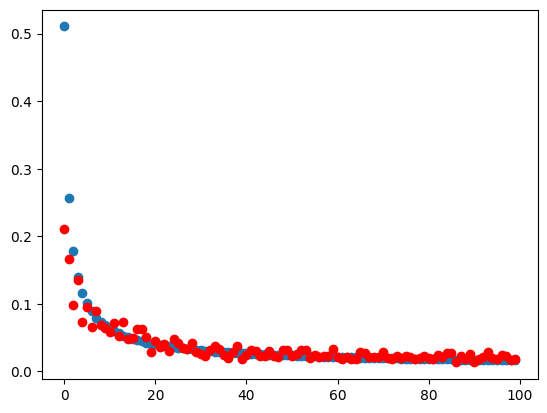

In [106]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

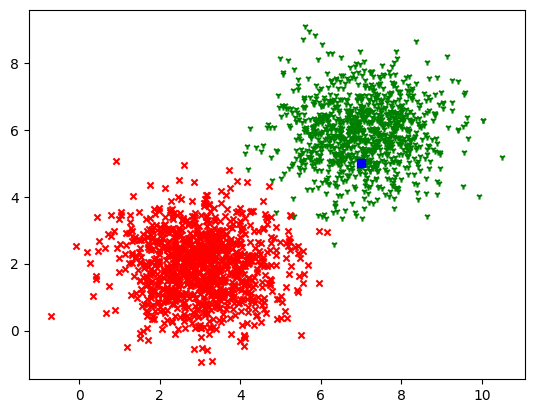

In [107]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [108]:
model.predict([[x,y]])

1/1 [==============================] - 0s 63ms/step


array([[1.]], dtype=float32)

##Batch size - 20

Definiujemy model:

In [109]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [110]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [111]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [112]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [113]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [114]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[4.59911355, 0.97664184],
       [5.12942909, 1.3036076 ],
       [2.86082513, 3.42102928],
       ...,
       [6.95434383, 6.18464347],
       [6.07670661, 6.40313423],
       [8.22009436, 6.28592032]])

Proces **uczenia**:

In [115]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2,batch_size=20)

Epoch 1/100
80/80 [==============================] - 1s 4ms/step - loss: 0.5988 - val_loss: 0.3922
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 0.3620 - val_loss: 0.2474
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 0.2699 - val_loss: 0.2038
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.2203 - val_loss: 0.1038
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 0.1853 - val_loss: 0.1467
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1616 - val_loss: 0.0839
Epoch 7/100
80/80 [==============================] - 0s 3ms/step - loss: 0.1445 - val_loss: 0.2046
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1292 - val_loss: 0.1483
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1190 - val_loss: 0.1190
Epoch 10/100
80/80 [==============================] - 0s 3ms/step - loss: 0.1093 - val_loss: 0.0872
Epoch 11/

In [116]:
Loss = h.history['loss']
Loss

[0.5987726449966431,
 0.36201345920562744,
 0.2699388861656189,
 0.22031454741954803,
 0.185256227850914,
 0.16159753501415253,
 0.14446403086185455,
 0.1292213797569275,
 0.11897514015436172,
 0.10926058888435364,
 0.10223916172981262,
 0.09523629397153854,
 0.08969052135944366,
 0.08493389934301376,
 0.08115440607070923,
 0.07676403224468231,
 0.07402627170085907,
 0.07062651216983795,
 0.06818094849586487,
 0.06561673432588577,
 0.06325826793909073,
 0.06112486869096756,
 0.05920268967747688,
 0.05812229961156845,
 0.05591798946261406,
 0.05453403294086456,
 0.05321015045046806,
 0.05208461359143257,
 0.05080564320087433,
 0.04958178102970123,
 0.048460040241479874,
 0.047471608966588974,
 0.04661481827497482,
 0.045596588402986526,
 0.04487833008170128,
 0.043989505618810654,
 0.043226517736911774,
 0.042274050414562225,
 0.04185282066464424,
 0.04079544171690941,
 0.040278252214193344,
 0.03969932720065117,
 0.03918968141078949,
 0.03852969780564308,
 0.03800367936491966,
 0.03734

Sprawdźmy jakie są **wartości wag**:

In [117]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[1.1901294]
 [1.6065422]]
[-12.003977]


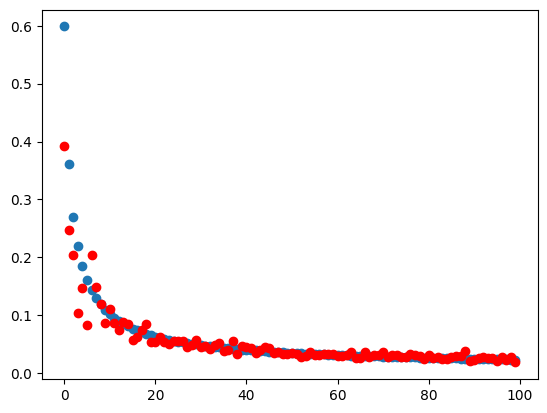

In [118]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

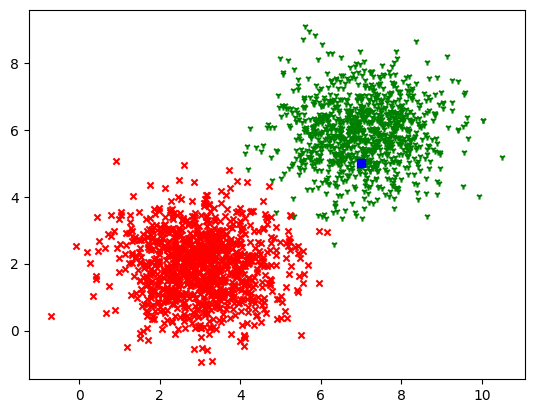

In [119]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [120]:
model.predict([[x,y]])

1/1 [==============================] - 0s 56ms/step


array([[1.]], dtype=float32)

##Batch size 50

Definiujemy model:

In [121]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [122]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [123]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [124]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [125]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [126]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[4.59911355, 0.97664184],
       [5.12942909, 1.3036076 ],
       [2.86082513, 3.42102928],
       ...,
       [6.95434383, 6.18464347],
       [6.07670661, 6.40313423],
       [8.22009436, 6.28592032]])

Proces **uczenia**:

In [127]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2, batch_size=50)

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 0.8754 - val_loss: 0.4132
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5251 - val_loss: 0.2629
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4094 - val_loss: 0.2983
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3498 - val_loss: 0.1831
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3124 - val_loss: 0.2516
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2799 - val_loss: 0.1953
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2541 - val_loss: 0.2360
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2346 - val_loss: 0.1795
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2174 - val_loss: 0.1950
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2026 - val_loss: 0.1855
Epoch 11/

In [128]:
Loss = h.history['loss']
Loss

[0.8753713369369507,
 0.5250717401504517,
 0.40939539670944214,
 0.3498138189315796,
 0.3124082088470459,
 0.2799290120601654,
 0.25408756732940674,
 0.23460164666175842,
 0.21735551953315735,
 0.20257216691970825,
 0.18981444835662842,
 0.17866037786006927,
 0.16915923357009888,
 0.16047711670398712,
 0.15280136466026306,
 0.14582078158855438,
 0.13960221409797668,
 0.1340065896511078,
 0.12915252149105072,
 0.12477990239858627,
 0.1198219582438469,
 0.11593522131443024,
 0.11227285116910934,
 0.10904650390148163,
 0.1056746393442154,
 0.10294134169816971,
 0.09995434433221817,
 0.09741412848234177,
 0.09511491656303406,
 0.09270186722278595,
 0.09057892858982086,
 0.0879959985613823,
 0.08677612990140915,
 0.08508307486772537,
 0.08313952386379242,
 0.08121130615472794,
 0.07985147833824158,
 0.07845069468021393,
 0.07685554772615433,
 0.0757279023528099,
 0.07404755800962448,
 0.0731266662478447,
 0.0717644914984703,
 0.07071849703788757,
 0.06950695812702179,
 0.06844130158424377,


Sprawdźmy jakie są **wartości wag**:

In [129]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.8336686]
 [1.2803266]]
[-9.240546]


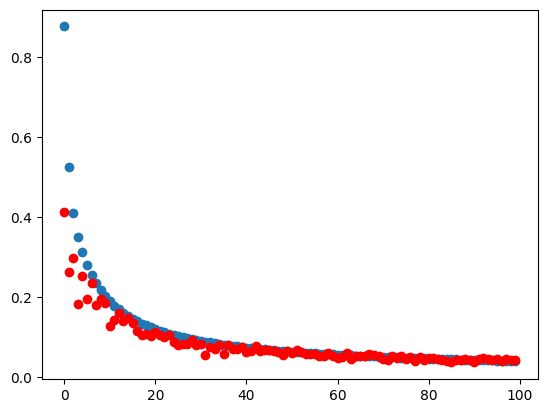

In [130]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

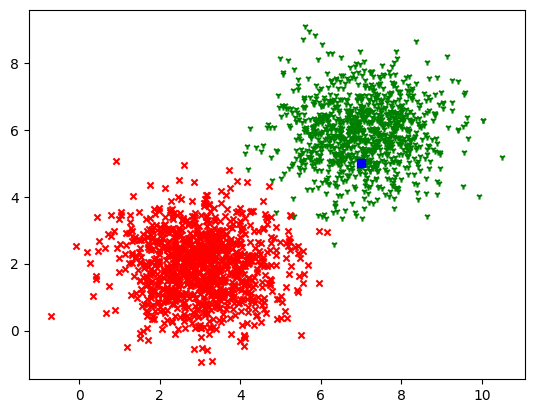

In [131]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [132]:
model.predict([[x,y]])

1/1 [==============================] - 0s 58ms/step


array([[1.]], dtype=float32)

Najlepsze wyniki otrzymałem dla współczynnika uczenia 0.1, liczby epok 3000, batcha równego 20, najgorsze dla współczynnika uczenia 0.001, liczby epok 10, batcha równego 50